# Étude des données de vente d'un site web.

Le fichier se compose d'un export des ventes de produits du site sur l'année 2011 (on imagine qu'on est l'année +1)

Notre but est de comprendre le flux client sur le site et quels sont les produits phares


Au moins 1 diagramme avec données continues, type nuage de point ou histogramme --> ~~unitPrice / quantité~~ <br>
Au moins 2 diagrammes avec des données discrètes --> ~~quantié / date~~, ~~quantité / pays~~ <br>
Au moins 3 graphiques avec des données catégoriques -> ~~users / pays~~, nb produit / users, nb commande /country <br>
1 boîte à moustaches avec filtrage des données aberrantes sur le dataset (si il y en a)<br>
1 heat map avec matrice de corrélation (si pertinent)<br>
Des commentaires clairs et pertinents pour chaque graphiques 

In [219]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

h = pd.read_csv('./data.csv',encoding="ISO-8859-1"); 
h.InvoiceDate = pd.to_datetime(h.InvoiceDate)
h = h.sort_values(by='InvoiceDate', ascending=True)
h.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
24,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,4.95,13047.0,United Kingdom


In [107]:
h.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Il semble qu'il y ait des données abérantes, certains prix étant en dessous de 0. Il faut les supprimer.

In [283]:
h = h[(h['UnitPrice'] > 0) & (h['Quantity'] > 0) & ( h['Quantity'] < 1000)]

## Nous allons déjà regarder quand le site fait le plus de vente

<AxesSubplot:>

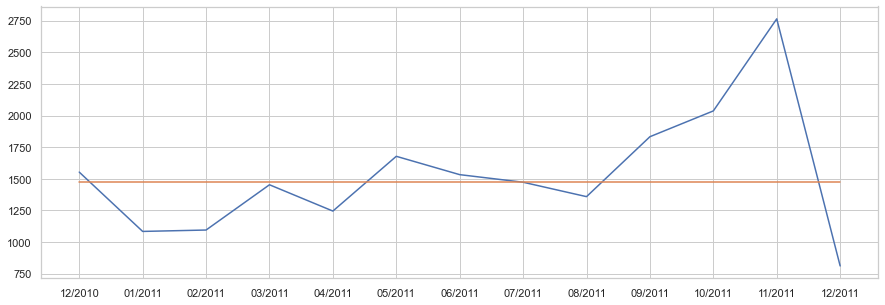

In [284]:
import statistics as stat

d = {}
s = {}

for (i,x) in h.groupby(['InvoiceNo']):
    date = x.iloc[0]['InvoiceDate'].strftime("%m/%Y")
    if date in d:
        d[date] = d[date] + 1
    else :
        d[date] = 1
med =  stat.median(d.values())   

for x in d.keys():
    s[x] = med
    
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)        

sns.lineplot(x=d.keys(), y=d.values(), ax=ax)
sns.lineplot(x=s.keys(), y=s.values(), ax=ax)

On peut constater que le nombre median de vente est d'environ 1983 commandes / mois, sauf sur le mois de novembre où on observe un pic de commandes. 

On utilise ici une médianne et non un moyenne qui serait faussée par le pic du mois de novembre et ne serait donc pas représentatif du nombre de ventes mensuel moyen.

## Nous allons maintenant chercher à étudier les utilisateurs

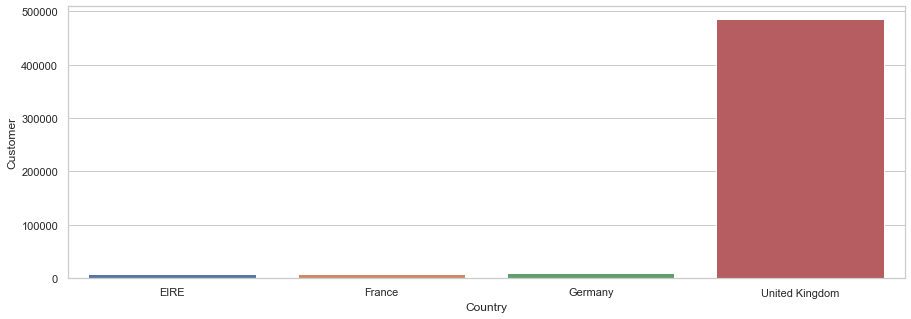

In [287]:
d = pd.DataFrame({'Customer': [], 'Country': []})
total = len(h)
for (i,x) in h.groupby(['Country']):
    if len(x)/total > 0.01:
        d = d.append({'Customer': len(x), 'Country': i}, ignore_index=True)

fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)      

ax = sns.barplot(x='Country', y='Customer', data=d, ax=ax)


On peut déjà constater que la très grande majorité des clients viennent du Royaume-Unis.

<AxesSubplot:>

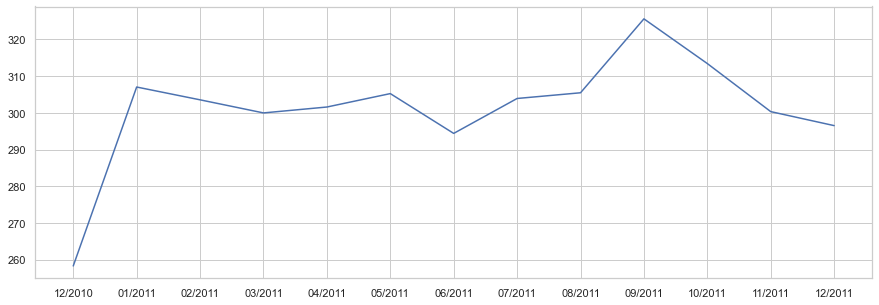

In [322]:
d = {}
s = {}

for (i,x) in h.groupby(['InvoiceNo']):
    date = x.iloc[0]['InvoiceDate'].strftime("%m/%Y")
    if not date in d:
        d[date] = {}
    else :
        m = x['UnitPrice'] * x['Quantity']
        d[date].update({i: m.sum()})


r = {}
for (i,x) in d.items():
    r[i] = stat.median(x.values())

fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)        

sns.lineplot(x=r.keys(), y=r.values(), ax=ax)

On peut voir ci-dessus le panier moyen par utilisateur chaque mois. On constate que le panier moyen se trouve autour de 300€. On observe toutefois un pic au mois de septembre mais pas au mois de novembre qui a lui enregistré le plus fort taux de commandes.

## On peut maintenant étudier les produits et leur popularité

<AxesSubplot:xlabel='Quantity', ylabel='UnitPrice'>

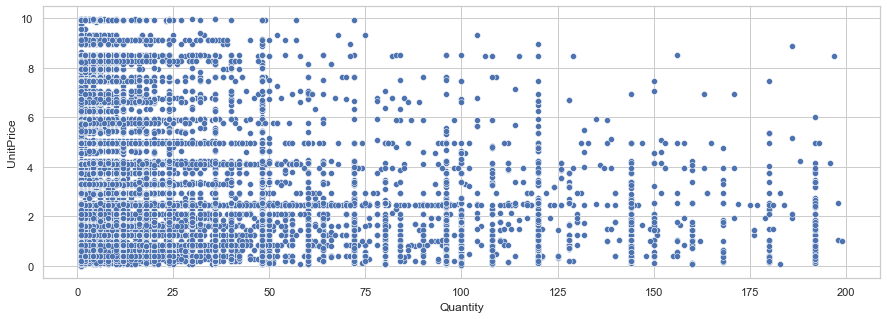

In [257]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)      
sns.scatterplot(y='UnitPrice', x='Quantity', data=h[(h['UnitPrice'] < 10) & (h['Quantity'] < 200)], ax=ax)

Ce graphique nous permet de voir la répartition de la quantité commandé en fonction du prix unitaire. Nous ne prenons ici que les commandes avec un produit ayant un prix unitaire inférieur à 10 car c'est plus de 75% de notre échantillon. Et ça nous permet d'avoir une meilleure vue de la répartition.

<AxesSubplot:xlabel='Quantity', ylabel='Country'>

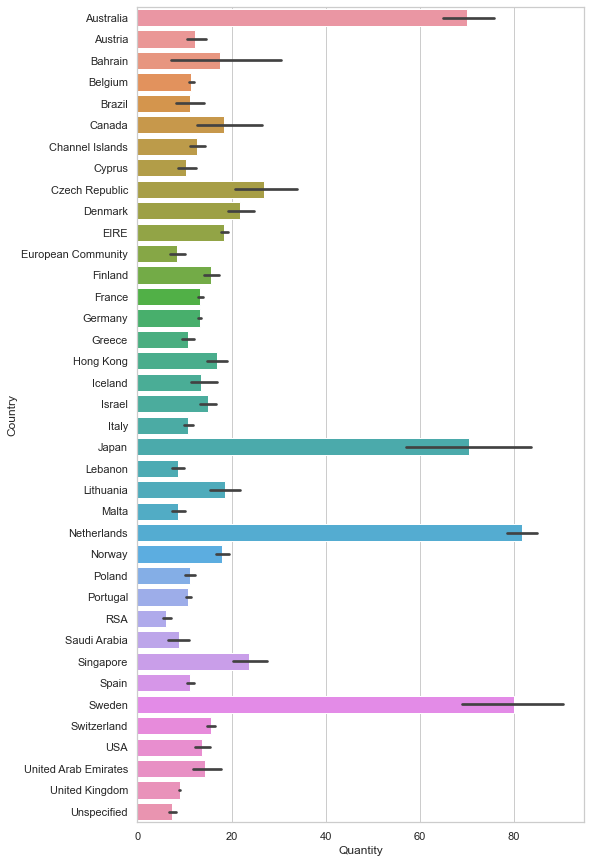

In [281]:
fig_dims = (8, 15)
fig, ax = plt.subplots(figsize=fig_dims)      

sns.barplot(x='Quantity', y='Country', data=h.sort_values(['Country', 'Quantity']), ax=ax)

Ce graphique nous permet de constater la quantité moyenne commandée par produit par pays. 
On constate que le Royaume-unis, bien qu'étant le pays ou il y a le plus d'utilisateurs est aussi celui ou les utilisateurs commandes le moins en quantité. Il faut toutefois préciser que certains pays on peut de commandes mais avec beaucoup de quantité.

<AxesSubplot:xlabel='InvoiceDate', ylabel='Quantity'>

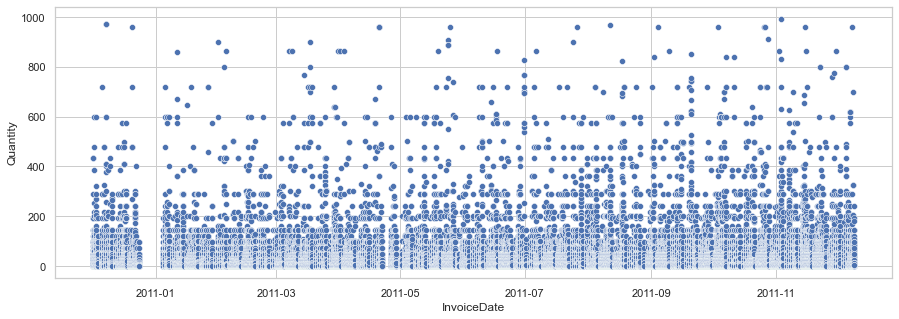

In [290]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)      
sns.scatterplot(x='InvoiceDate', y='Quantity', data=h[h['Quantity'] > 0], ax=ax)